¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# Proyecto Aprendizaje Automático en Negocios (Caso OilyGiant)

## Introducción

La extracción de petróleo es una industria crucial para el suministro energético global. En este proyecto, hemos sido encargados por OilyGiant para identificar las mejores ubicaciones donde abrir 200 nuevos pozos petroleros. Nuestro objetivo es maximizar el beneficio total mientras minimizamos los riesgos asociados.

Para lograrlo, utilizaremos técnicas avanzadas de análisis de datos y modelado predictivo. En particular, aplicaremos bootstrapping para evaluar los beneficios y riesgos potenciales en tres regiones con muestras de crudo. A través de este enfoque, determinaremos la región con el mayor margen de beneficio y presentaremos nuestras recomendaciones al cliente.

## Objetivos

* Crear un modelo preciso que estime el volumen de reservas en los nuevos pozos petroleros.

* Identificar los pozos con los valores estimados más altos y evaluar su viabilidad.

* Utilizar bootstrapping para evaluar los beneficios potenciales y los riesgos asociados en cada región.

* Seleccionar la región óptima que maximice el beneficio total para OilyGiant.

## Información General del Proyecto

### Carga de librerías

In [2]:
#importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score

### Carga de Base de Datos

In [3]:
#Carga de datasets de las tres regiones geológicas
geo1 = pd.read_csv("/datasets/geo_data_0.csv")
geo1

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [4]:
geo2 = pd.read_csv("/datasets/geo_data_1.csv")
geo2

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


In [5]:
geo3 = pd.read_csv("/datasets/geo_data_2.csv")
geo3

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


## Preparación de Datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769   

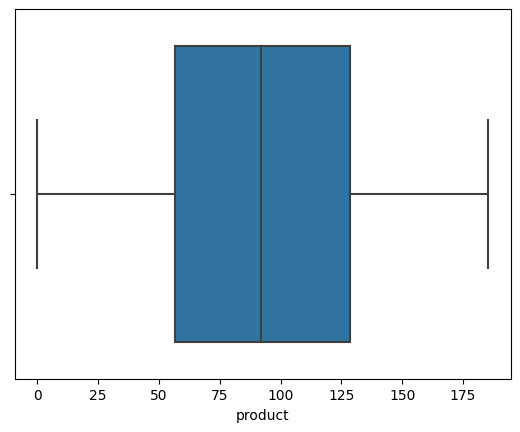

In [31]:
# Revisión General de los Datasets

geo1.info()
print(geo1.describe())
print()
print("Existen:", geo1.duplicated().sum(), "duplicados")

sns.boxplot(x=geo1['product'])
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%         1.153055      -4.813172       2.011479      57.085625
75%         8.621015      -1.332816       3.999904     107.813044
max        29.421755      18.734063   

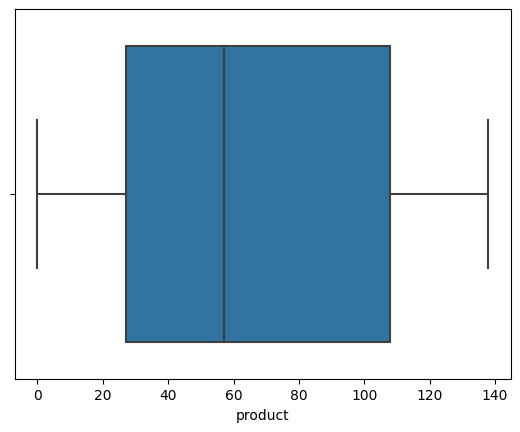

In [30]:
# Revisión General de los Datasets

geo2.info()
print(geo2.describe())
print()
print("Existen:", geo2.duplicated().sum(), "duplicados")

sns.boxplot(x=geo2['product'])
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.495128      95.000000
std         1.732045       1.730417       3.473445      44.749921
min        -8.760004      -7.084020     -11.970335       0.000000
25%        -1.162288      -1.174820       0.130359      59.450441
50%         0.009424      -0.009482       2.484236      94.925613
75%         1.158535       1.163678       4.858794     130.595027
max         7.238262       7.844801   

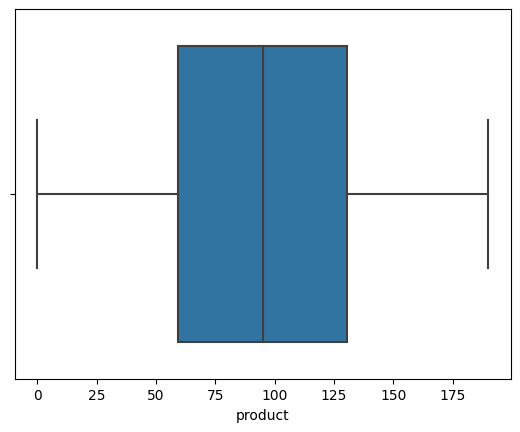

In [29]:
# Revisión General de los Datasets

geo3.info()
print(geo3.describe())
print()
print("Existen:", geo3.duplicated().sum(), "duplicados")

sns.boxplot(x=geo3['product'])
plt.show()

* Se realiza la carga de los datasets de cada una de las regiones
* Posterior a esto se realiza la verificación de valores ausentes y duplicados que pudieran presentarse sin encontrar novedades
* Se realiza revision de outliers usando diagramas de caja para determinar valores atípicos, de las gráficas se desprende que no existen este tipo de valores que se deban corregir
* Por último se verifica que el tipo de datos sean correctos, en esta ocasión no se requiere realizar ningún cambio

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buena exploración inicial de los datos. En este punto ya tienes una idea general de cómo están distribuidos los datos de las diferentes regiones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Solamente te recomiendo hacer un análisis de outliers
</div>

<div class="alert alert-block alert-info">
<b>Siguiendo la recomendación del revisor y usando diagramas de caja se analizan valores atípicos que pudieran contener el dataset</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes!
</div>

## Entrenamiento y Prueba del Modelo

In [9]:
### Región 1

features1 = geo1.drop(['id','product'],axis=1)
target1 = geo1['product']

features_train1, features_valid1, target_train1, target_valid1 = train_test_split(features1,target1,test_size=0.25,random_state=54321)

print(features_train1.shape)
print(target_train1.shape)
print(features_valid1.shape)
print(target_valid1.shape)

(75000, 3)
(75000,)
(25000, 3)
(25000,)


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo segmentando, solamente te recomiendo hacer el escalando la información. El escalado te puede ser muy útil para mejorar el rendimiento del modelo al asegurar que todas las características tienen el mismo rango. 
</div>



In [10]:
# Entrenamiento por Región Geo1

def predictions(features_train, target_train, features_valid):
    model = LinearRegression()
    model.fit(features_train, target_train)

    predictions = model.predict(features_valid)

    return predictions


predictions1 = predictions(features_train1, target_train1, features_valid1)


print(predictions1)


[110.10119015 122.70089493  84.02360311 ...  97.34624779 131.18932401
 112.04038766]


In [11]:
#Promedio Predicho Geo1

def average_geo(predictions):
    
    average_geo = predictions.sum()/len(predictions)

    return average_geo

average_geo1 = average_geo(predictions1) 

print(average_geo1)



92.15921155743655


In [12]:
# Calcula rmse Geo1

def rmse(predictions, target_valid):
    residuos = predictions - target_valid

    # Calcula el RMSE
    rmse = np.sqrt(mean_squared_error(target_valid, predictions))
    return rmse
    
print("RMSE1:", rmse(predictions1, target_valid1))



RMSE1: 37.68341093860808


In [13]:
### Región 2

features2 = geo2.drop(['id','product'],axis=1)
target2 = geo2['product']

features_train2, features_valid2, target_train2, target_valid2 = train_test_split(features2,target2,test_size=0.25,random_state=54321)

print(features_train2.shape)
print(target_train2.shape)
print(features_valid2.shape)
print(target_valid2.shape)

(75000, 3)
(75000,)
(25000, 3)
(25000,)


In [14]:
# Entrenamiento Región 2

predictions2 = predictions(features_train2, target_train2, features_valid2)
print(predictions2)

[ 26.68414634   2.43485932 106.57884102 ...  83.82874899   2.88845354
  29.44067583]


In [15]:
#Promedio Predicho Geo2

average_geo2 = average_geo(predictions2) 

print(average_geo2)



68.44594093153303


In [16]:
# Calcula rmse Geo2
    
print("RMSE2:", rmse(predictions2, target_valid2))



RMSE2: 0.8922819708481473


In [17]:
### Región 3

features3 = geo3.drop(['id','product'],axis=1)
target3 = geo3['product']

features_train3, features_valid3, target_train3, target_valid3 = train_test_split(features3,target3,test_size=0.25,random_state=54321)

print(features_train3.shape)
print(target_train3.shape)
print(features_valid3.shape)
print(target_valid3.shape)

(75000, 3)
(75000,)
(25000, 3)
(25000,)


In [18]:
# Entrenamiento Región 3

predictions3 = predictions(features_train3, target_train3, features_valid3)

print(predictions3)

[ 90.61604045 102.20865398  62.19323797 ... 127.34285598  70.33268229
 126.34202394]


In [19]:
#Promedio Predicho Geo3

average_geo3 = average_geo(predictions3) 

print(average_geo3)



94.92229500787454


In [20]:
# Calcula rmse Geo3
    
print("RMSE3:", rmse(predictions3, target_valid3))



RMSE3: 40.15250541784855


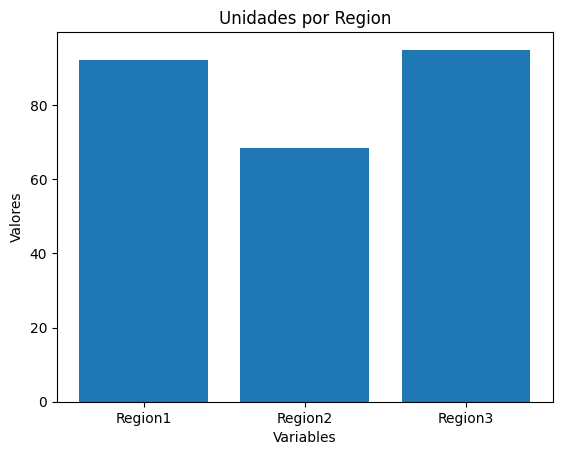

In [21]:
# Configuración de la gráfica de predicciones por region

variables = ['Region1', 'Region2', 'Region3']
valores = [average_geo1, average_geo2, average_geo3]

# Crear el gráfico de barras
plt.bar(variables, valores)
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.title('Unidades por Region')

plt.show()

* Analizando las predicciones por region podemos observar que la region 3 generaria ingresos por encima de las regiones 2 y ligeramente sobre la 1, sin embargo no es suficiente para tomar un decision aun

* Ademas del resultado de RMSE podemos ver que nuestro modelo se encuentra haciendo buenas predicciones, especialmente para los datos de la region 2

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Implementaste el modelo de regresión logística de forma excelente para los 3 conjuntos de datos! En este punto ya puedes obervar cuál es el modelo con el mayor $R^2$ y menor RMSE. A pesar de que la elección de la región 1 pareciera ser muy clara por estas dos métricas, su volumen es significativamente menor al de las otras regiones. Debido a esto es necesario realizar unos cuántos análisis más.
</div>

## Evaluar la Mejor Región para Inversión

In [22]:
#Promedio de reservas por region, target por region 111.1 unidades

avg_geo1 = geo1['product'].mean()
print(avg_geo1)

avg_geo2 = geo2['product'].mean()
print(avg_geo2)

avg_geo3 = geo3['product'].mean()
print(avg_geo3)

92.50000000000001
68.82500000000002
95.00000000000004


* En promedio ninguna de las regiones supera los 111.1 unidades que se requieren para realizar una inversión, este analisis incluye el total de los pozos

* Pero podemos evindenciar que la región 3 es la que en promedio presenta más unidades, con 95 unidades

* Basado en este hallazgo, podríamos empezar explorandos los 200 mejores pozos por region para confirmar o desmentir lo dicho sobre la region 3

## Cálculo de Ganancias

Las ganancias de la región 1 es: 139311815.2383101

Las ganancias de la región 2 es: 124814117.57168561

Las ganancias de la región 3 es: 133699030.29257256


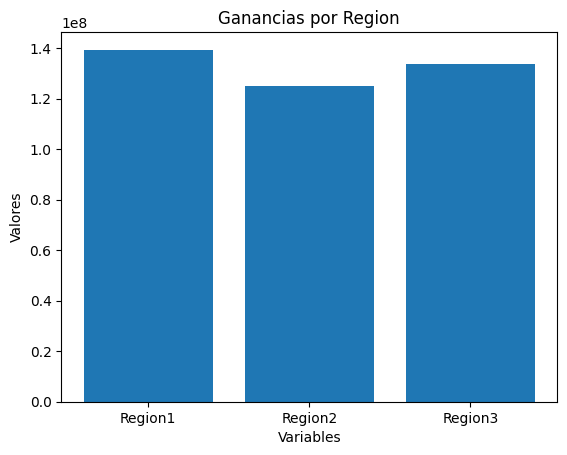

In [23]:
# Transforma los arrays a series

predictions1 = pd.Series(predictions1)
predictions2 = pd.Series(predictions2)
predictions3 = pd.Series(predictions3)

# Funcion de para obtener los 200 mejores pozos por region de acuerdo con la prediccion
def top(predictions):

    top200 = np.argpartition(predictions, -200)[-200:]
    top200 = pd.Series(predictions[top200])
        
    return top200

top200_R1 = top(predictions1)
top200_R2 = top(predictions2)
top200_R3 = top(predictions3)

# Funcion de calculo de ganancia de los 200 mejores pozos por region de acuerdo con la prediccion
def ganancia(predictions):

    top200 = np.argpartition(predictions, -200)[-200:]
    top200 = pd.Series(predictions[top200])
    revenue = (top200.sum())*4500
    return revenue
    return top200

revenue1 = ganancia(predictions1)
revenue2= ganancia(predictions2)
revenue3 = ganancia(predictions3)
print("Las ganancias de la región 1 es:", revenue1)
print()
print("Las ganancias de la región 2 es:", revenue2)
print()
print("Las ganancias de la región 3 es:", revenue3)

# Configuración de la gráfica

variables = ['Region1', 'Region2', 'Region3']
valores = [revenue1, revenue2, revenue3]

# Crear el gráfico de barras
plt.bar(variables, valores)
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.title('Ganancias por Region')

plt.show()

* De acuerdo con la comparativa de ganancias por region, tomando en cuenta los 200 pozos que mas generarian en la prediccion, se puede observar que tanto la region 1 y 3 podrian ser potenciales candidatas, mientras que la region 2 por esta ocasion no sera parte de esta etapa

* Tomando en cuenta el monto de proyeccion de las ganancias, por una pequena diferencia, la region 1 seria la que mas ingresos genere a la empresa por la que la someteremos a pruebas adicionales para confirmar nuestra eleccion 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien calculado el beneficio bruto de las 3 regiones! Estos cálculos te ayudarán en la elección de la mejor región teniendo en cuenta también los beneficios brutos según las predicciones, pero a pesar de que el beneficio bruto sea mayor en tu conjunto data2, es necesario comprobar los riesgos que implica.
</div>



## Calculo de Riesgos y Ganancias por Region

In [24]:
#Bootstrapping

def profit(top200):
    state = np.random.RandomState(12345)

    # Guarda los valores del cuantil del 95 % en la variable de valores
    values = []
    for i in range(1000):
        subsample = top200.sample(frac=1, replace=True, random_state=state)
        values.append(subsample.quantile(0.95))
        # < escribe tu código aquí >

    # < escribe tu código aquí >
    values = pd.Series(values)

    lower = (values.quantile(0.05))*4500# < escribe tu código aquí >
    upper = (values.quantile(0.95))*4500# < escribe tu código aquí >
    mean = (values.mean())*4500
    return lower,upper,mean

print("Calculo de Riesgo por Region")
print()
print("Region1")
profit1 = profit(top200_R1)
print("Beneficio Min:", profit1[0])
print("Beneficio Max:", profit1[1])
print("Beneficio Promedio:", profit1[2])
print()
print("Region2")
profit2 = profit(top200_R2)
print("Beneficio Min:", profit2[0])
print("Beneficio Max:", profit2[1])
print("Beneficio Promedio:", profit2[2])
print()
print("Region3")
profit3 = profit(top200_R3)
print("Beneficio Min:", profit3[0])
print("Beneficio Max:", profit3[1])
print("Beneficio Promedio:", profit3[2])


Calculo de Riesgo por Region

Region1
Beneficio Min: 741551.9362795784
Beneficio Max: 760873.3203611933
Beneficio Promedio: 749370.0518560936

Region2
Beneficio Min: 626011.2499487235
Beneficio Max: 627175.6141920694
Beneficio Promedio: 626532.7985802505

Region3
Beneficio Min: 710675.7475731525
Beneficio Max: 743766.2371538646
Beneficio Promedio: 725026.1916360541


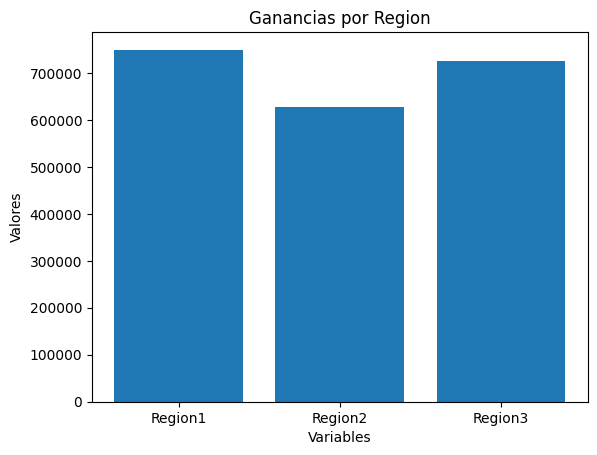

In [25]:
# Configuración de la gráfica

variables = ['Region1', 'Region2', 'Region3']
valores = [profit1[2], profit2[2], profit3[2]]

# Crear el gráfico de barras
plt.bar(variables, valores)
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.title('Ganancias por Region')

plt.show()

* Utilizando bootstraping podemos visualizar que los resultados promedio usando boostrapping se parecen mucho a nuestra grafica de calculo de las ganancias anteriormente analizado

* Esto ratifica nuestra eleccion acerca de la region 1 como la mejor opcion para abrir una nueva operacion

In [26]:
#Verifica pozos del top200 con menos de 111.1 unidades para determinar si existe perdida por region

print("Unidade minimas en Region 1:",top200_R1.min())

print("Unidade minimas en Region 2:",top200_R2.min())

print("Unidade minimas en Region 3:",top200_R3.min())

Unidade minimas en Region 1: 147.65259511326417
Unidade minimas en Region 2: 138.36373638976985
Unidade minimas en Region 3: 142.17265913916506


* De acuerdo con este análisis, del top 200 de pozos por region elegidas, ninguno estaria por debajo de las 111.1 unidades que se requieren para generar ganancia

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo calculando el beneficio promedio, los intervalos de confianza del 95% y el riesgo de pérdidas. El uso de percentiles para los intervalos de confianza es una muy buena práctica este tipo de análisis. Tus cálculos están bien fundamentados, solamente te recomiendo hacer simulaciones de bootstrap.
</div>



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes!
</div>

## Conclusiones

* La Región 1 es la mejor opción para perforar nuevos pozos de petróleo, ya que tiene el mayor ingreso promedio predicho y ningún pozo en el top 200 está por debajo de las unidades requeridas para obtener ganancias.

* Se utilizaron gráficos de barras para comparar los ingresos promedio predichos de tres regiones, lo que ayudó a identificar la región más rentable.

* Se aplicó el método de bootstrapping para evaluar los riesgos y ganancias, confirmando que la Región 1 ofrece el mejor equilibrio entre ingresos y riesgos.

* La conclusión final del análisis es que la Región 1 es la opción óptima para las nuevas operaciones de perforación, basándose en los ingresos predichos y la ausencia de pozos no rentables en esta región.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes! Que sigas disfrutando los siguientes cursos!
</div>